In [178]:
a = [1,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0]


In [4]:
def pad_movement(floor, window_pad):
    for x in range(len(floor) - window_pad):
        if floor[x] == 1:
            # Search for the next 1 in the next window_pad frames
            for y in range(x + 1, x + window_pad):
                if floor[y] == 1:
                    # If a 1 is found, set all values in between to 1
                    for z in range(x + 1, y):
                        floor[z] = 1
                    break
    return floor

def extract_floor_traces(dat, pad_frames=90):
    floor1 = pad_movement(dat['door5'], pad_frames)
    floor2 = pad_movement(dat['door6'], pad_frames)
    print(dat)
    
    floor_traces = []
    print(floor_traces)
    # Add floor1 [x] to floor2 [x]
    for x in range(len(floor1)):
        print(x)
        floor_traces.append(floor1[x] + floor2[x])
        
    
    floor_starts = []
    floor_ends = []
    isMoving = False
    for x in range(len(floor_traces)):
        if floor_traces[x] == 2:
            if isMoving == False:
                floor_starts.append(x)
                isMoving = True
        if floor_traces[x] < 2:
            if isMoving == True:
                floor_ends.append(x)
                isMoving = False
    
    return floor_starts, floor_ends


In [2]:
import matplotlib.pyplot as plt # for plotting
from tmaze_toolkit.data.extraction import selectDoorCoords, extractDoorTraces, initial_coords
from tmaze_toolkit.processing.signal import bandpass_filter, process_door_traces
from tmaze_toolkit.visualization.plotDoorTraces import plotDoorTraces
from tmaze_toolkit.data.openFunctions import openDoorTracesPkl
from tmaze_toolkit.processing.extractTrialTimes import extract_floor_traces, extract_trial_times, verify_correct_trial_times, pad_movement
from tmaze_toolkit.data.jsonProcessing import load_json_files, add_trajectories, save_outDict
from tmaze_toolkit.visualization.plotTrajectory import plot_trajectory
from tmaze_toolkit.processing.normalize import normalize_trajectory
from tmaze_toolkit.data.deeplabcutProcessing import load_deeplabcut_files


In [7]:
# Specificy Door Traces .pkl file
# This file contains the door traces for the video
pkl_file = r"N:\TMAZE\MasterMouseFolder\ATO6\Clipped Videos\ATO6_2025-03-25T15_30_36_doorTraces.pkl"

# Open this pkl and load the door traces
data = openDoorTracesPkl(pkl_file)

# specify location of the dlc model and traces
dlcFile = r"N:\TMAZE\MasterMouseFolder\ATO6\pkl and H5 files\ATO6_2025-03-25T15_30_36DLC_resnet50_Intermidiate textured DLC model Sep10shuffle1_100000.h5"
# specify location of the json files that contain maze metadata 
jsonFiles = r"n:\TMAZE\MasterMouseFolder\ATO6\jsonData\data_ATO6_20250325*"

# Open the json files and load the metadata
metaData = load_json_files(jsonFiles)

# If normalizing the trajectory, specify the video file location
videoFile = r"N:\TMAZE\MasterMouseFolder\ATO6\Clipped Videos\ATO6_2025-03-25T15_30_36.mp4"

Found 4 json files
Animal ID: ATO6
Working on file n:\TMAZE\MasterMouseFolder\ATO6\jsonData\data_ATO6_20250325_152945.json
Working on file n:\TMAZE\MasterMouseFolder\ATO6\jsonData\data_ATO6_20250325_154527.json
Working on file n:\TMAZE\MasterMouseFolder\ATO6\jsonData\data_ATO6_20250325_160030.json
Working on file n:\TMAZE\MasterMouseFolder\ATO6\jsonData\data_ATO6_20250325_162300.json


In [5]:
metaData.keys() # check the keys in the metadata dictionary]

dict_keys(['originalFiles', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163])

Text(0.5, 1.0, 'Door Traces')

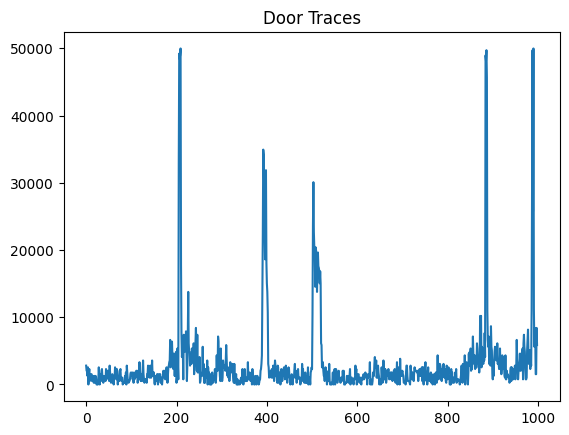

In [11]:
figure = plt.plot(data['door5'][1:1000], label='door5')
plt.title('Door Traces')  

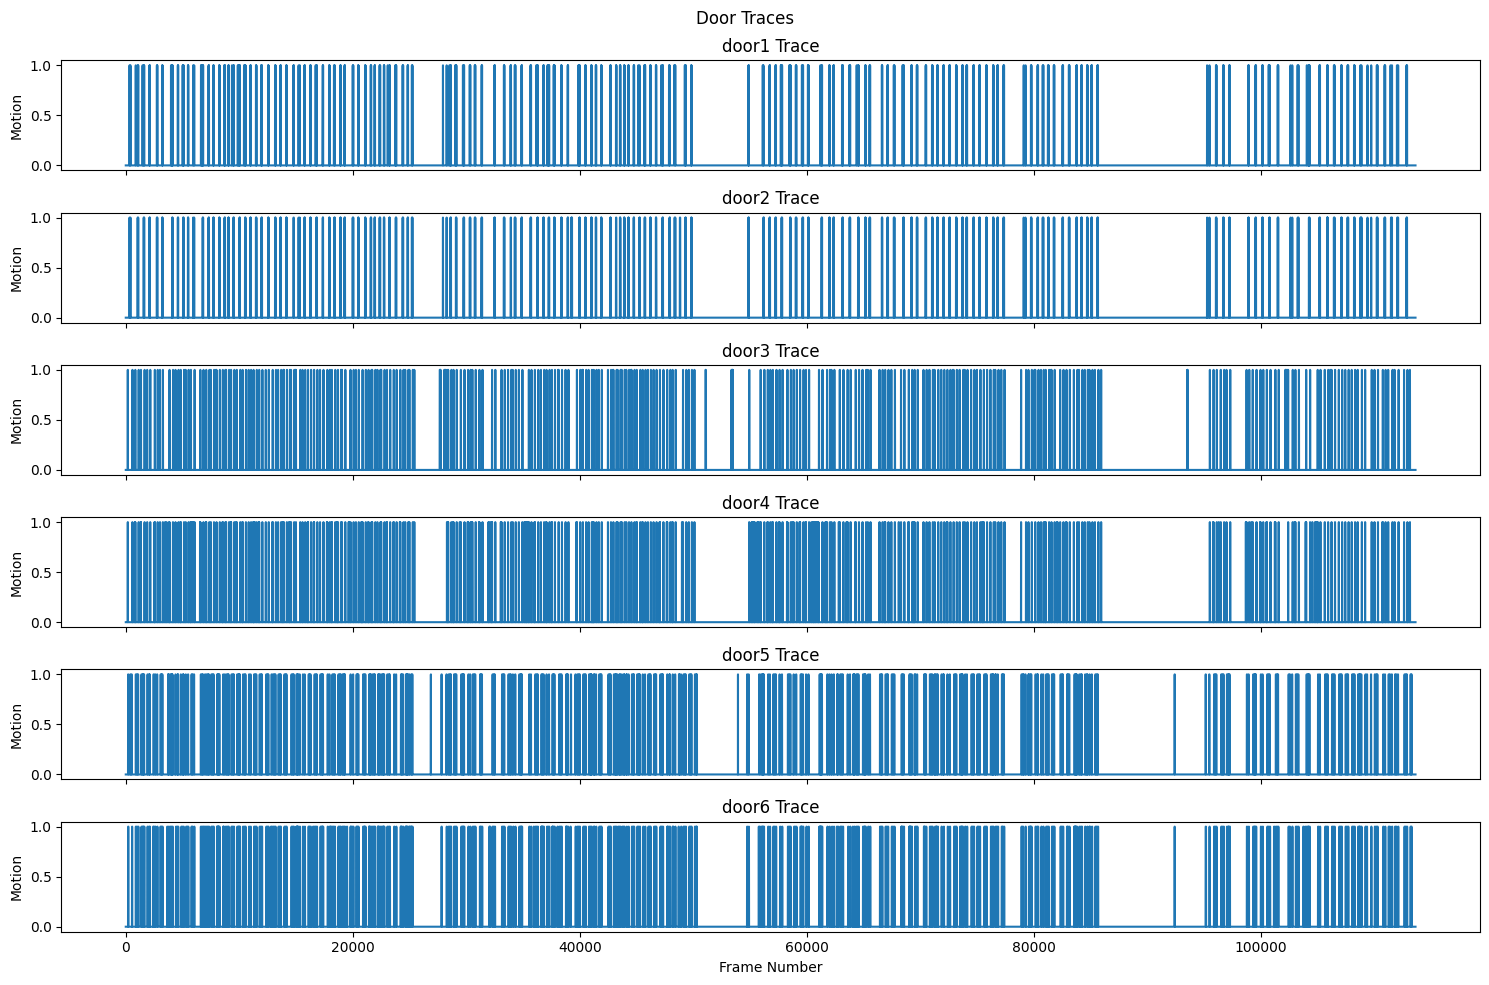

In [232]:
# Process the door traces
data = process_door_traces(data)

# Visualize result of processed data
plotDoorTraces(data)

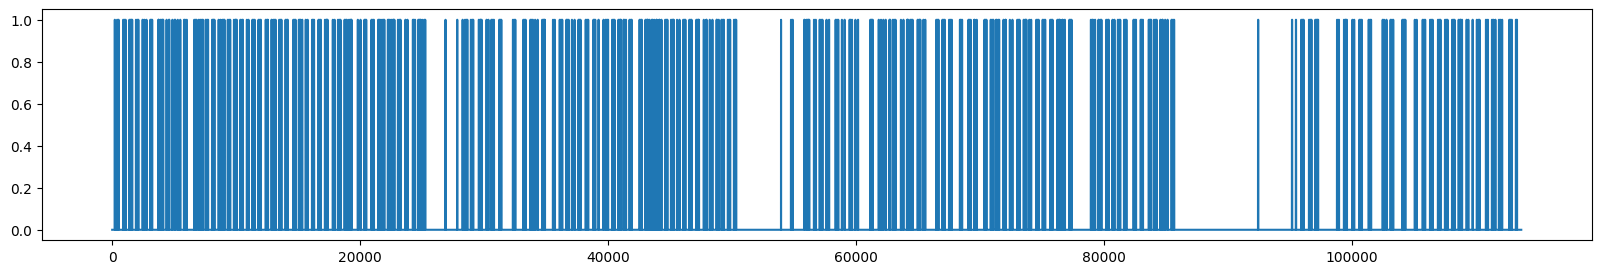

In [233]:
plt.figure(figsize=(20, 3))
plt.plot(data['door5'])

In [234]:
import numpy as np
data_ontime = np.where(data['door5'][1:] > data['door5'][:-1])[0] 
print(len(data_ontime))
data_offtime = np.where(data['door5'][1:] < data['door5'][:-1])[0]
print(len(data_offtime))


509
509


In [235]:
process_door5 = pad_movement(data['door5'], 150)
data_ontime5 = np.where(process_door5[1:] > process_door5[:-1])[0] 

data_offtime5 = np.where(process_door5[1:] < process_door5[:-1])[0]
print(len(data_offtime5))


process_door6 = pad_movement(data['door6'], 150)
data_ontime6 = np.where(process_door6[1:] > process_door6[:-1])[0] 

data_offtime6 = np.where(process_door6[1:] < process_door6[:-1])[0]
print(len(data_offtime6))
print(len(data_ontime6))
print()


193
184
184



In [219]:
a = np.array([0,1,0,0])

a[1:]

array([1, 0, 0])

In [189]:
a[:-1]

array([0, 1, 0])

In [153]:
a[1:] > a[:-1]

array([ True, False, False])

In [190]:
np.where(a[1:] > a[:-1])[0] # returns the index of the first element that is greater than the previous element

array([0])

In [236]:
process_door6 = pad_movement(data['door6'], 150)
data_ontime6 = np.where(process_door6[1:] > process_door6[:-1])[0] 
print(len(data_ontime6))
data_offtime6 = np.where(process_door6[1:] < process_door6[:-1])[0]
print(len(data_offtime6))

184
184


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\letmedoit\\Desktop\\door_traces.pdf'

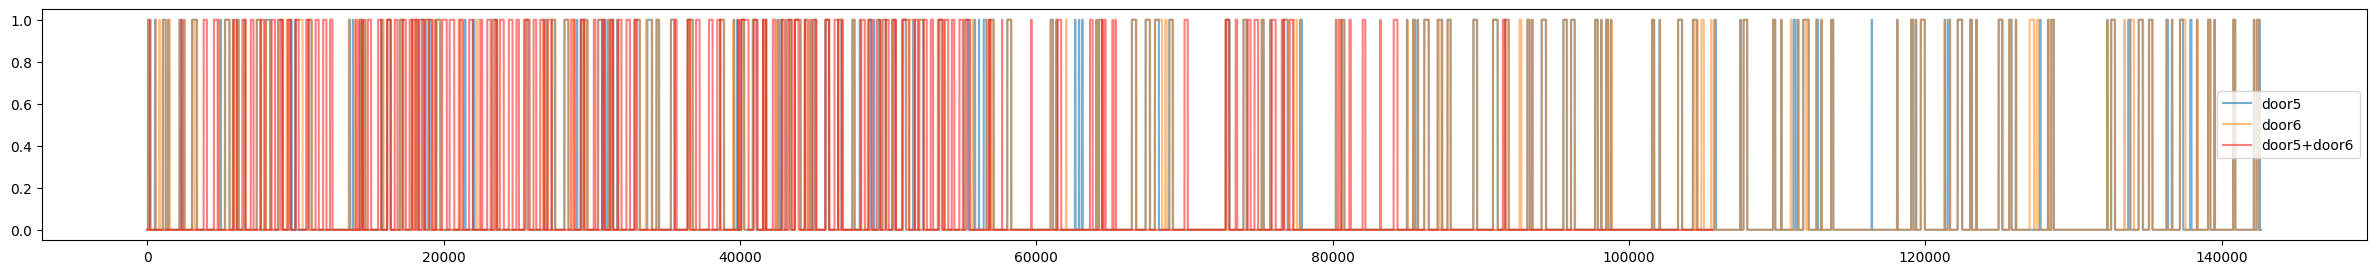

In [140]:
plt.figure(figsize=(30, 3))
plt.plot(process_door5, alpha = 0.6, label='door5')
plt.plot(process_door6, alpha = 0.5, label='door6')
plt.plot(new_time, 'red', alpha = 0.5, label='door5+door6')
plt.legend()
plt.savefig(r'C:\Users\letmedoit\Desktop\door_traces.pdf', dpi=300, bbox_inches='tight')

In [237]:
new_time = np.array(process_door5).astype(int) & np.array(process_door6).astype(int)
new_time_ontime = np.where(new_time[1:] > new_time[:-1])[0]
new_time_offtime = np.where(new_time[1:] < new_time[:-1])[0]
print(len(new_time_ontime))

162


In [238]:
data_offtime6 = np.where(process_door6[1:] < process_door6[:-1])[0]
data_offtime5 = np.where(process_door5[1:] < process_door5[:-1])[0]
print(data_offtime5)
print(data_offtime6)

[   221    524   1090   1615   2113   2770   3227   4117   4391   4608
   4856   5088   5293   5496   6023   6807   7324   7736   8249   9059
   9520  10049  10544  11002  11499  11993  12564  13186  13652  14161
  14798  15330  15770  16284  16831  17377  17947  18416  18931  19304
  19818  20036  20491  21109  21952  22763  23255  23823  24432  25005
  25252  26886  27837  28272  28648  29121  29803  30350  30792  31387
  32516  33348  33936  34114  34322  34903  35705  36300  36820  37084
  37298  37772  38395  38964  39238  39635  40000  40520  41038  41442
  41907  42718  43348  43717  43930  44305  44781  45294  45560  45758
  46234  46731  47327  47720  47944  48203  48414  48927  49340  49843
  50326  53946  54892  56221  56757  57288  57617  57825  58561  58857
  59079  59673  59944  60162  61345  61834  62014  62195  62393  62750
  63182  63617  63820  64193  64561  65182  65581  66644  67155  67722
  68551  69250  69735  70514  71073  71541  72073  72404  72611  73183
  7373

In [239]:
matches = list(set(data_offtime5) & set(data_offtime6))
print("Number of exact matches:", len(matches))
print("Matching frame indices:", matches)

Number of exact matches: 0
Matching frame indices: []


In [240]:
new_time_duration = new_time_offtime - new_time_ontime
new_time_duration/30

array([ 0.73333333,  7.16666667,  8.1       ,  6.83333333,  6.23333333,
        5.53333333, 13.26666667,  1.3       ,  1.83333333,  0.63333333,
        7.9       ,  6.76666667, 11.83333333,  6.83333333,  6.7       ,
       16.13333333,  6.9       ,  7.8       ,  7.36666667,  5.03333333,
        6.7       ,  6.76666667,  6.33333333, 11.66666667,  6.5       ,
        6.33333333,  6.8       ,  9.53333333,  5.73333333,  5.8       ,
        6.7       ,  7.53333333,  5.46666667,  7.2       ,  6.6       ,
        7.36666667,  0.4       ,  0.6       ,  5.3       ,  6.86666667,
       16.96666667, 17.93333333,  7.2       ,  1.        ,  6.4       ,
       11.        ,  3.16666667,  0.73333333,  6.86666667,  6.73333333,
        8.03333333,  5.6       ,  7.36666667,  5.83333333,  6.86666667,
        6.76666667,  7.26666667,  7.7       ,  5.46666667,  7.2       ,
        6.63333333,  0.56666667,  5.83333333,  7.16666667,  5.43333333,
        7.06666667,  6.93333333,  7.43333333,  6.6       ,  6.36

In [196]:
len(np.where((new_time_duration > 2*30) & (new_time_duration < 11*30))[0]) # check the indices of the new_time_duration array where the values are greater than 0

80

In [242]:
import pandas as pd
from tmaze_toolkit.data.jsonProcessing import load_json_files
def find_concurrent_events(trace1, trace2, window_frames=15):
    """
    Find distinct trial events when two doors move concurrently.
    
    Args:
        trace1 (list): First door trace (binary 0/1 values)
        trace2 (list): Second door trace (binary 0/1 values)
        window_frames (int): Window size to check for concurrent movement
        
    Returns:
        List of frame indices where distinct events start
    """
    events = []  # Store frame numbers where events start
    i = 0  # Initialize frame counter
    
    # Loop through the traces, stopping window_frames before the end to prevent overflow
    while i < len(trace1) - window_frames:
        # Get a slice of frames to check for concurrent movement
        window1 = trace1[i:i+window_frames]  # Window for first door
        window2 = trace2[i:i+window_frames]  # Window for second door
        
        # Check if both doors show any movement (1's) in their windows
        if 1 in window1 and 1 in window2:
            # If both doors moved, record the start frame of this window
            events.append(i)
            # Skip ahead by the window size to avoid detecting the same event multiple times
            i += window_frames
        else:
            # If no concurrent movement, check the next frame
            i += 1
            
    return events

def pad_movement(floor, window_pad):
    for x in range(len(floor) - window_pad):
        if floor[x] == 1:
            # Search for the next 1 in the next window_pad frames
            for y in range(x + 1, x + window_pad):
                if floor[y] == 1:
                    # If a 1 is found, set all values in between to 1
                    for z in range(x + 1, y):
                        floor[z] = 1
                    break
    return floor

def extract_floor_traces(dat, pad_frames=90):
    floor1 = pad_movement(dat['door5'], pad_frames)
    floor2 = pad_movement(dat['door6'], pad_frames)
    floor_traces = []

    # Add floor1 [x] to floor2 [x]
    for x in range(len(floor1)):
        floor_traces.append(floor1[x] + floor2[x])
    
    floor_starts = []
    floor_ends = []
    isMoving = False
    for x in range(len(floor_traces)):
        if floor_traces[x] == 2:
            if isMoving == False:
                floor_starts.append(x)
                isMoving = True
        if floor_traces[x] < 2:
            if isMoving == True:
                floor_ends.append(x)
                isMoving = False
    
    return floor_starts, floor_ends

def clean_trial_events(starts, ends, window_frames):
    """
    Clean trial events to ensure proper sequencing (start -> end -> start -> end)
    
    Args:
        starts (list): Frame numbers of potential trial starts
        ends (list): Frame numbers of potential trial ends
        window_frames (int): Window size used for detection
        
    Returns:
        tuple: Lists of cleaned trial starts and ends
    """
    cleaned_starts = []
    cleaned_ends = []
    last_end = 0
    
    i, j = 0, 0  # Indices for starts and ends lists
    
    while i < len(starts) and j < len(ends):
        current_start = starts[i]
        current_end = ends[j]

        
        # If we find a valid start (after last end) and its corresponding end
        if current_start > last_end and current_end > current_start:
            cleaned_starts.append(current_start)
            cleaned_ends.append(current_end)
            last_end = current_end
            i += 1
            j += 1
        # Skip invalid starts (before last end)
        elif current_start <= last_end:
            i += 1
        # Skip ends that come before their start
        elif current_end <= current_start:
            j += 1

    while i < len(starts) and j < len(ends):
        current_start = starts[i]
        current_end = ends[j]
            
    return cleaned_starts, cleaned_ends

def extract_trial_times(dat, window_frames=15, pad_frames=90, fps=30, use_floor_traces=False):
    floor_starts, floor_ends = extract_floor_traces(dat, pad_frames)
    trial_starts = find_concurrent_events(dat['door1'], dat['door2'], window_frames)
    trial_ends = find_concurrent_events(dat['door3'], dat['door4'], window_frames)
   
    cleaned_starts, cleaned_ends = clean_trial_events(trial_starts, trial_ends, window_frames)

    print(f"Floor Starts: {len(floor_starts)}")
    print(f"Floor Ends: {len(floor_ends)}")

    print(f"Trial Starts: {len(cleaned_starts)}")
    print(f"Trial Ends: {len(cleaned_ends)}")

    if use_floor_traces:
        cleaned_starts, cleaned_ends = clean_trial_events(floor_starts, floor_ends, window_frames)
    

    floors_trials_df = pd.DataFrame({
        'trial_start_frame': floor_starts,
        'trial_end_frame': floor_ends,
        'trial_start_time': [frame/fps for frame in floor_starts],
        'trial_end_time': [frame/fps for frame in floor_ends],
        'trial_duration': [(end - start)/fps for start, end in zip(floor_starts, floor_ends)]
    })

    trials_df = pd.DataFrame({
        'trial_start_frame': cleaned_starts,     # Frame numbers where trials begin
        'trial_end_frame': cleaned_ends,         # Frame numbers where trials end
        'trial_start_time': [frame/fps for frame in cleaned_starts],  # Convert frames to seconds
        'trial_end_time': [frame/fps for frame in cleaned_ends]       # Convert frames to seconds
    })
    for i in range(len(trials_df)):
        if abs(trials_df['trial_end_frame'][i] - floors_trials_df['trial_start_frame'][i]) > 60:
            print(f"Trial {i} likely has a missed detection in the doors 1 and 2")

    return trials_df


def verify_correct_trial_times(trial_df, jsonFileLocation):
    """
    Verify the correctness of the trial times by comparing them to the json file
    Args:
        trial_df: pandas dataframe, the dataframe containing the trial times
        jsonFileLocation: string, the location of the json file
    Returns:
        bool: True if the trial times are correct, False otherwise
    """
    json_files = load_json_files(jsonFileLocation)
    
    if (len(json_files) - 1) != len(trial_df):
        print(f"Warning: Number of trials in the json file and the trial dataframe do not match")
        return False
    
    else:
        print("Trial times verified successfully")
        return True

In [243]:
extract_trial_times(data)

Floor Starts: 162
Floor Ends: 162
Trial Starts: 163
Trial Ends: 163
Trial 0 likely has a missed detection in the doors 1 and 2
Trial 1 likely has a missed detection in the doors 1 and 2
Trial 2 likely has a missed detection in the doors 1 and 2
Trial 3 likely has a missed detection in the doors 1 and 2
Trial 4 likely has a missed detection in the doors 1 and 2
Trial 5 likely has a missed detection in the doors 1 and 2
Trial 6 likely has a missed detection in the doors 1 and 2
Trial 8 likely has a missed detection in the doors 1 and 2
Trial 10 likely has a missed detection in the doors 1 and 2
Trial 11 likely has a missed detection in the doors 1 and 2
Trial 12 likely has a missed detection in the doors 1 and 2
Trial 13 likely has a missed detection in the doors 1 and 2
Trial 14 likely has a missed detection in the doors 1 and 2
Trial 15 likely has a missed detection in the doors 1 and 2
Trial 16 likely has a missed detection in the doors 1 and 2
Trial 17 likely has a missed detection i

KeyError: 162

In [12]:
events = extract_trial_times(data)
verify_correct_trial_times(events, jsonFiles)

Floor Starts: 0
Floor Ends: 0
Trial Starts: 0
Trial Ends: 0
Found 4 json files
Animal ID: ATO6
Working on file n:\TMAZE\MasterMouseFolder\ATO6\jsonData\data_ATO6_20250325_152945.json
Working on file n:\TMAZE\MasterMouseFolder\ATO6\jsonData\data_ATO6_20250325_154527.json
Working on file n:\TMAZE\MasterMouseFolder\ATO6\jsonData\data_ATO6_20250325_160030.json
Working on file n:\TMAZE\MasterMouseFolder\ATO6\jsonData\data_ATO6_20250325_162300.json


False

In [246]:

dlc_dict = load_deeplabcut_files(dlcFile)

print(metaData)

# Match the mouse movements to the trials using time stamps from events
metaData = add_trajectories(metaData, dlc_dict, events)

# Specify location to save the metadata + trajectories
# This will be a json file that contains the metadata and the trajectories
savePath = r"N:\TMAZE\MasterMouseFolder\ATO1\Clipped Videos\ATO1_2025-03-23T14_49_36_doorTraces.pkl"

# Save the updated metadata dictionary to a json file
save_outDict(metaData, savePath)

{'originalFiles': ['n:\\TMAZE\\MasterMouseFolder\\ATO6\\jsonData\\data_ATO6_20250325_152945.json', 'n:\\TMAZE\\MasterMouseFolder\\ATO6\\jsonData\\data_ATO6_20250325_154527.json', 'n:\\TMAZE\\MasterMouseFolder\\ATO6\\jsonData\\data_ATO6_20250325_160030.json', 'n:\\TMAZE\\MasterMouseFolder\\ATO6\\jsonData\\data_ATO6_20250325_162300.json'], 0: {'MazeTexture': 'CNO', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision': 'correct', 'floorID': 'F,1', 'time_for_trial': 2, 'valve': 1, 'lick': 'right(V2)', 'trial_number': 1, 'trial_time': [2025, 3, 25, 15, 29, 48, 1, 84, 1], 'right_probability': 0.5, 'rewardAmount(ms)': 5, 'BiasCorrection(T/F)': False, 'coneHeight_1(floor1)': '0.75', 'coneHeight_2(floor2)': '0.25', 'Injection': '2'}, 1: {'MazeTexture': 'CNO', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision': 'correct', 'floorID': 'F,4', 'time_for_trial': 6, 'valve': 4, 'lick': 'left(V1)', 'trial_number': 2, 'trial_time': [2025, 3, 25, 15, 30, 6, 1, 84, 1], 'right_probabili

IndexError: list index out of range

NameError: name 'filt_x1' is not defined

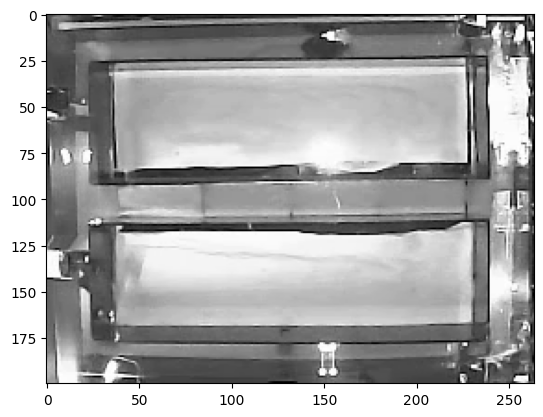